## AVL Trees

AVL trees are self-balancing, which means that the tree height is kept to a minimum so that a very fast runtime is guaranteed for searching, inserting and deleting nodes, with time complexity O(logn).

The only difference between a regular Binary Search Tree and an AVL Tree is that AVL Trees do rotation operations in addition, to keep the tree balance.

A Binary Search Tree is in balance when the difference in height between left and right subtrees is less than 2.

By keeping balance, the AVL Tree ensures a minimum tree height, which means that search, insert, and delete operations can be done really fast.

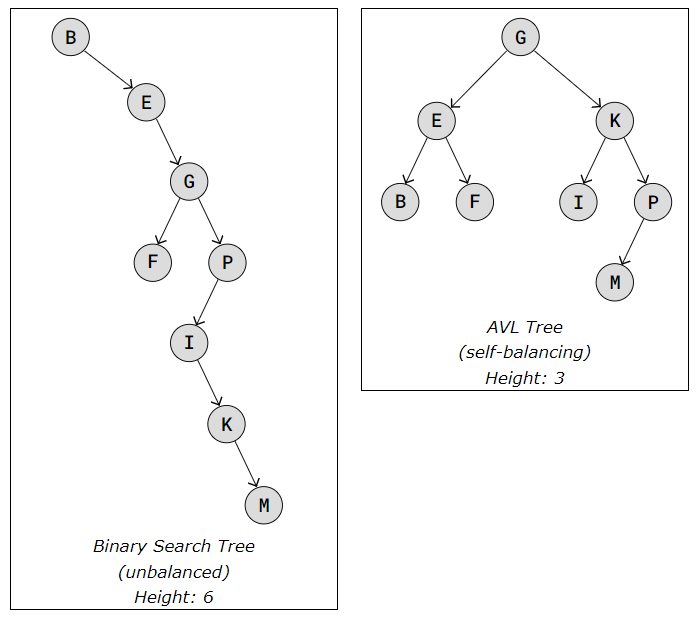

The two trees above are both Binary Search Trees, they have the same nodes, and the same in-order traversal (alphabetical), but the height is very different because the AVL Tree has balanced itself.

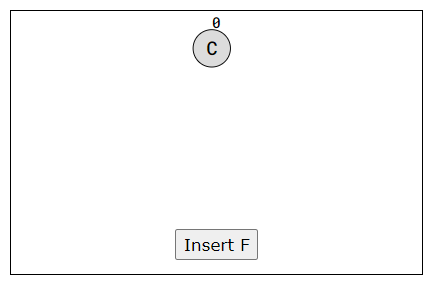

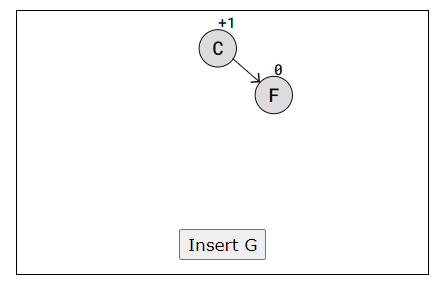

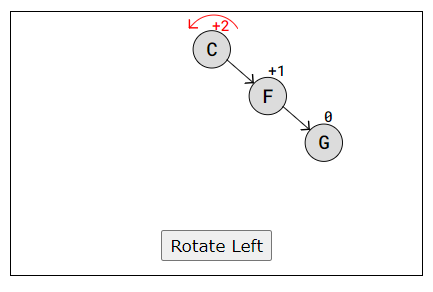

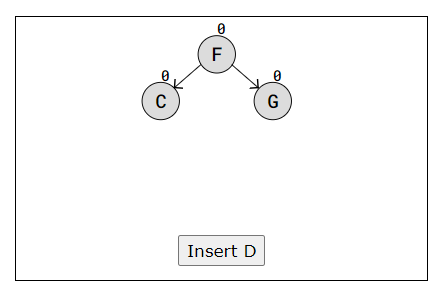

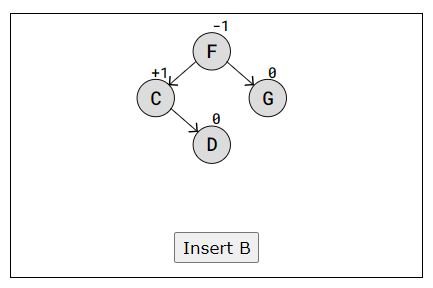

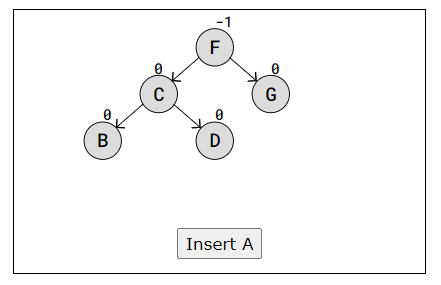

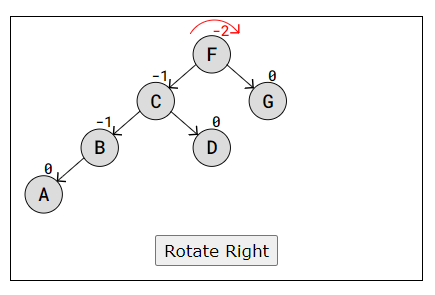

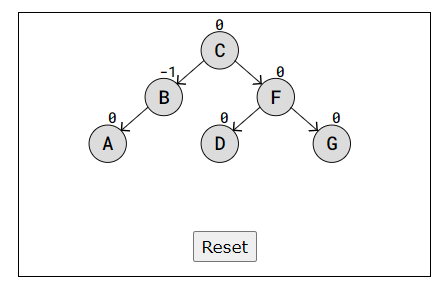

## Left and Right Rotations

To restore balance in an AVL Tree, left or right rotations are done, or a combination of left and right rotations.

But in general, left and right rotations are done like in the animation below.

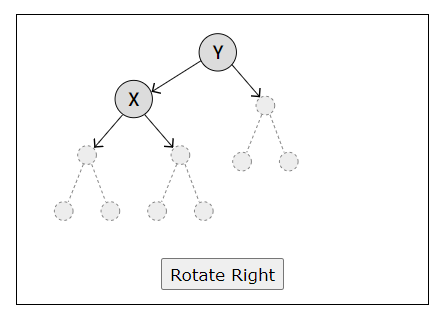

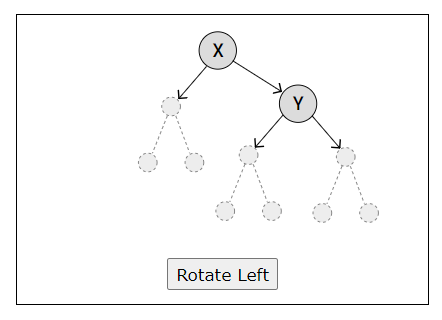

Notice how the subtree changes its parent. Subtrees change parent in this way during rotation to maintain the correct in-order traversal, and to maintain the BST property that the left child is less than the right child, for all nodes in the tree.

Also keep in mind that it is not always the root node that become unbalanced and need rotation.

## The Balance Factor

A node's balance factor is the difference in subtree heights.

The subtree heights are stored at each node for all nodes in an AVL Tree, and the balance factor is calculated based on its subtree heights to check if the tree has become out of balance.

The height of a subtree is the number of edges between the root node of the subtree and the leaf node farthest down in that subtree.

The Balance Factor (BF) for a node (X) is the difference in height between its right and left subtrees.
- BF(X) = height( rightSubtree(X) ) - height( leftSubtree(X) )

Balance factor values

- 0: The node is in balance.
- more than 0: The node is "right heavy".
- less than 0: The node is "left heavy".

If the balance factor is less than -1, or more than 1, for one or more nodes in the tree, the tree is considered not in balance, and a rotation operation is needed to restore balance.

## The Four "out-of-balance" Cases

When the balance factor of just one node is less than -1, or more than 1, the tree is regarded as out of balance, and a rotation is needed to restore balance.

There are four different ways an AVL Tree can be out of balance, and each of these cases require a different rotation operation.

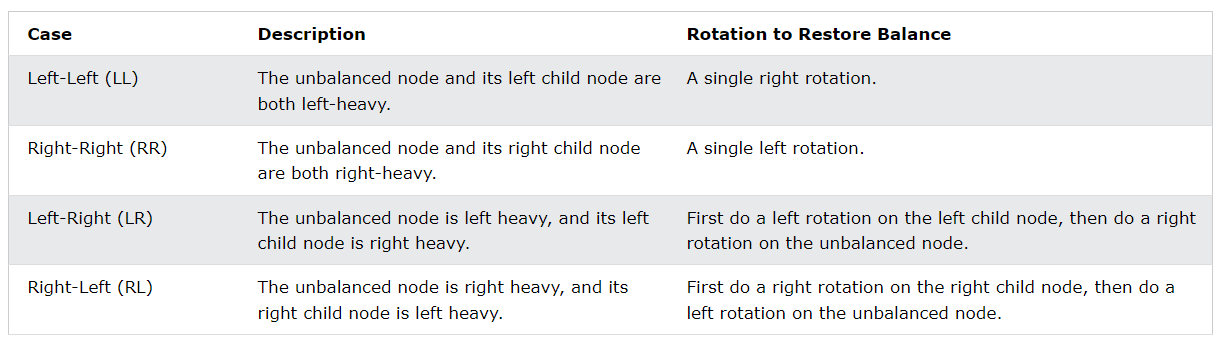

## The Left-Left (LL) Case

The node where the unbalance is discovered is left heavy, and the node's left child node is also left heavy.

When this LL case happens, a single right rotation on the unbalanced node is enough to restore balance.

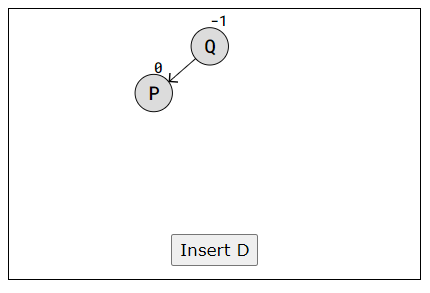

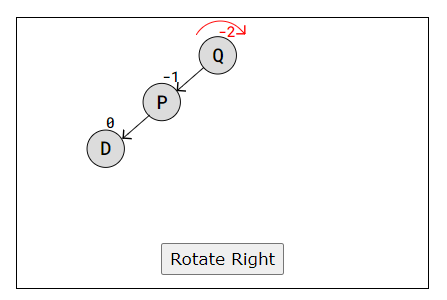

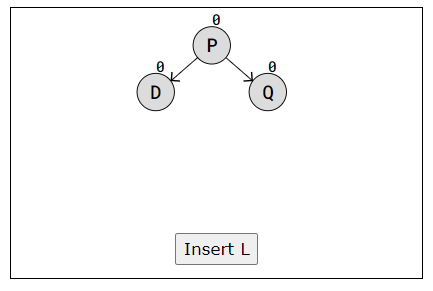

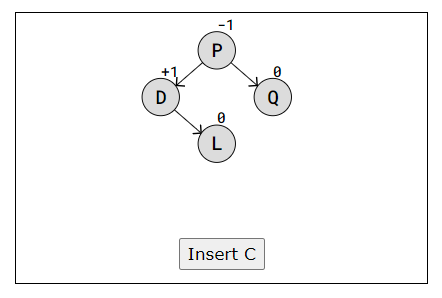

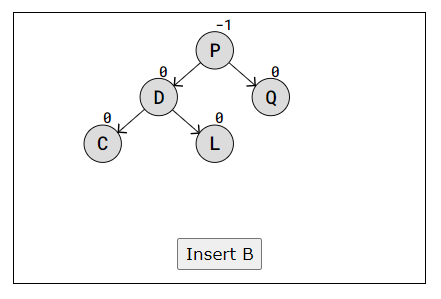

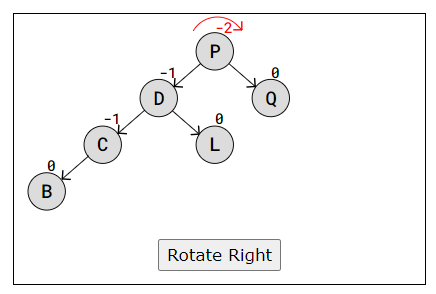

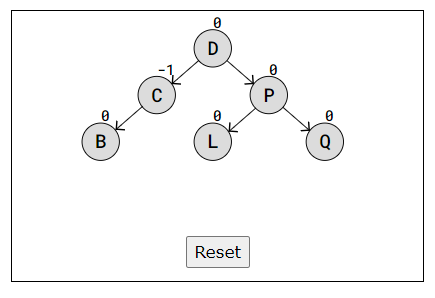

As you step through the animation above, two LL cases happen:

- When D is added, the balance factor of Q becomes -2, which means the tree is unbalanced. This is an LL case because both the unbalance node Q and its left child node P are left heavy (negative balance factors). A single right rotation at node Q restores the tree balance.

- After nodes L, C, and B are added, P's balance factor is -2, which means the tree is out of balance. This is also an LL case because both the unbalanced node P and its left child node D are left heavy. A single right rotation restores the balance.

Note: The second time the LL case happens in the animation above, a right rotation is done, and L goes from being the right child of D to being the left child of P. Rotations are done like that to keep the correct in-order traversal ('B, C, D, L, P, Q' in the animation above). Another reason for changing parent when a rotation is done is to keep the BST property, that the left child is always lower than the node, and that the right child always higher.

## The Right-Right (RR) Case

A Right-Right case happens when a node is unbalanced and right heavy, and the right child node is also right heavy.

A single left rotation at the unbalanced node is enough to restore balance in the RR case.

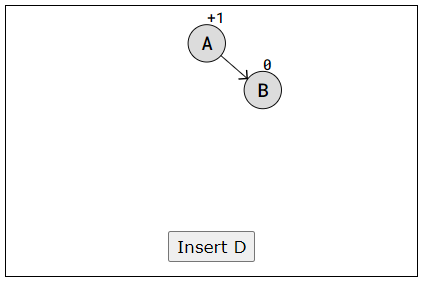

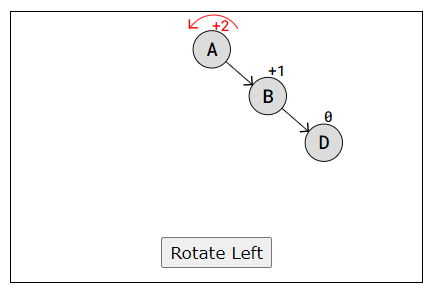

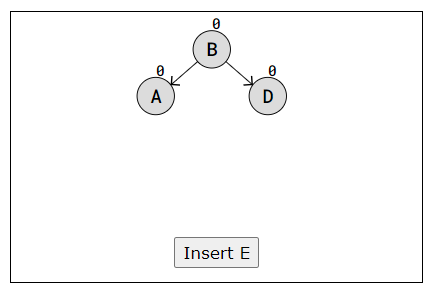

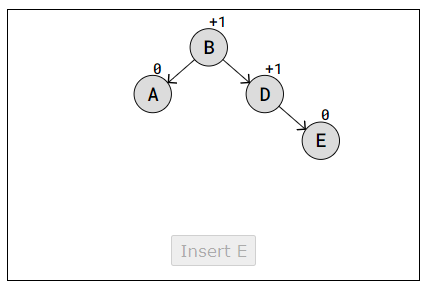

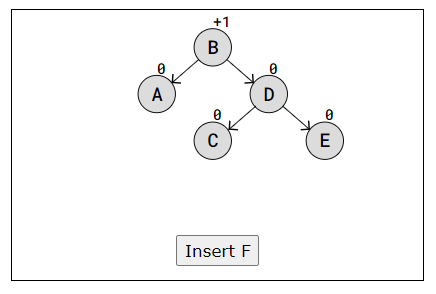

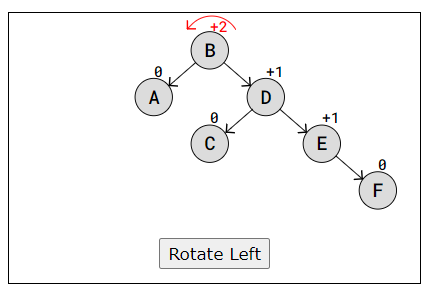

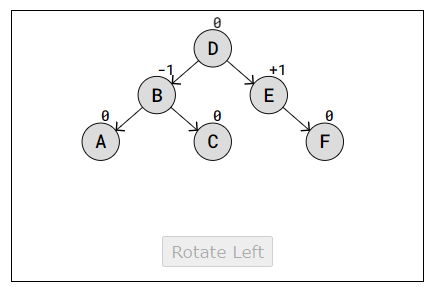

The RR case happens two times in the animation above:

- When node D is inserted, A becomes unbalanced, and bot A and B are right heavy. A left rotation at node A restores the tree balance.
- After nodes E, C and F are inserted, node B becomes unbalanced. This is an RR case because both node B and its right child node D are right heavy. A left rotation restores the tree balance.

## The Left-Right (LR) Case

The Left-Right case is when the unbalanced node is left heavy, but its left child node is right heavy.

In this LR case, a left rotation is first done on the left child node, and then a right rotation is done on the original unbalanced node.

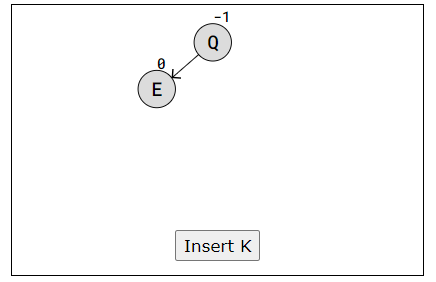

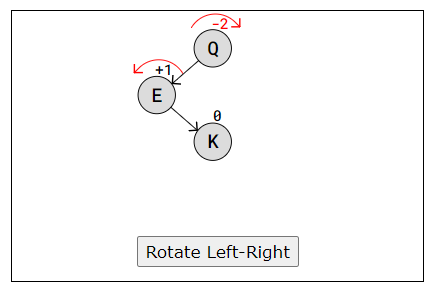

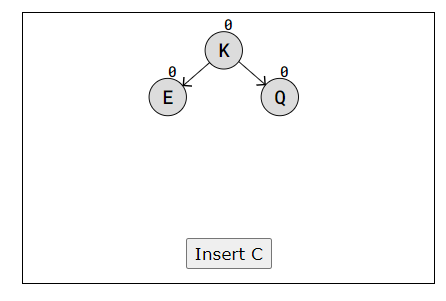

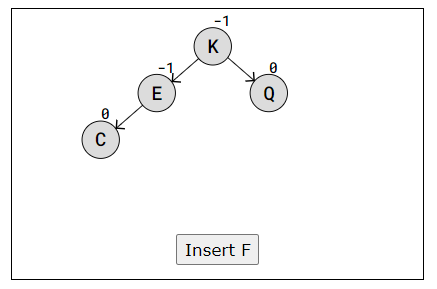

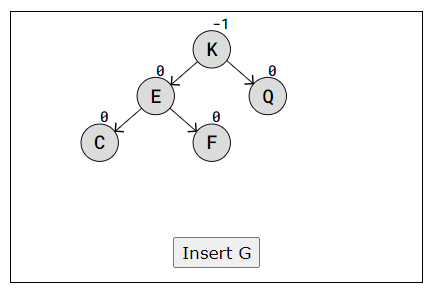

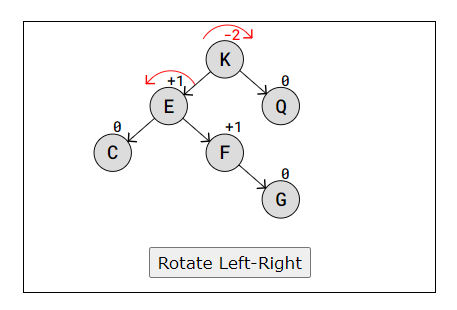

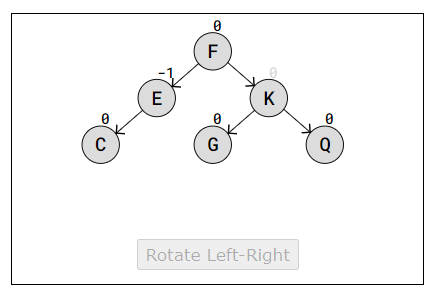

As you are building the AVL Tree in the animation above, the Left-Right case happens 2 times, and rotation operations are required and done to restore balance:

- When K is inserted, node Q gets unbalanced with a balance factor of -2, so it is left heavy, and its left child E is right heavy, so this is a Left-Right case.
- After nodes C, F, and G are inserted, node K becomes unbalanced and left heavy, with its left child node E right heavy, so it is a Left-Right case.

## The Right-Left (RL) Case

The Right-Left case is when the unbalanced node is right heavy, and its right child node is left heavy.

In this case we first do a right rotation on the unbalanced node's right child, and then we do a left rotation on the unbalanced node itself.

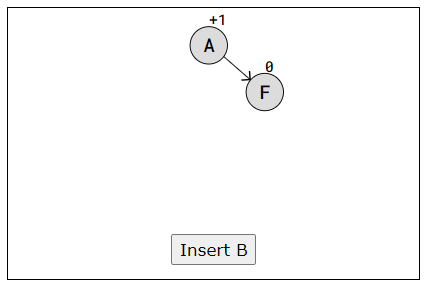

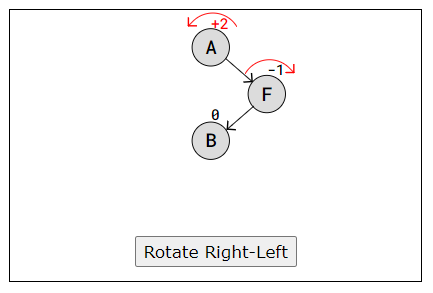

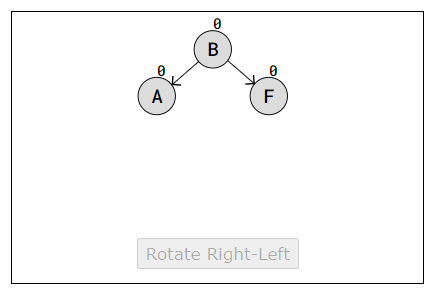

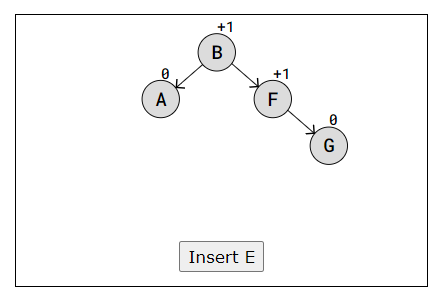

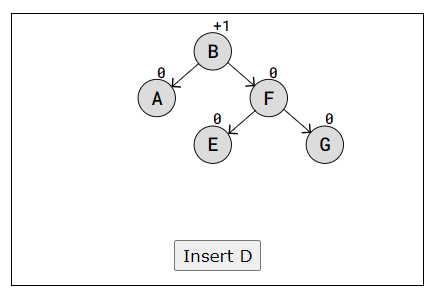

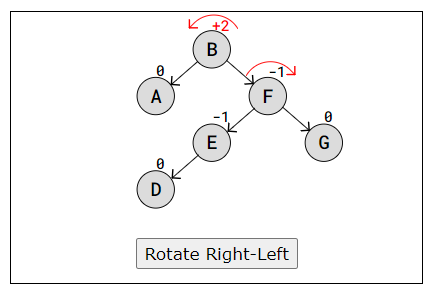

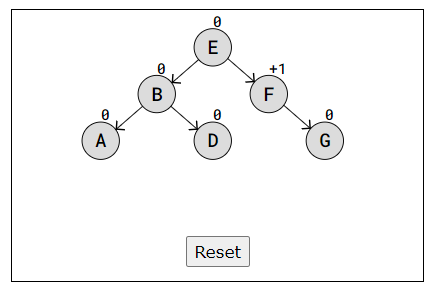

After inserting node B, we get a Right-Left case because node A becomes unbalanced and right heavy, and its right child is left heavy. To restore balance, a right rotation is first done on node F, and then a left rotation is done on node A.

The next Right-Left case occurs after nodes G, E, and D are added. This is a Right-Left case because B is unbalanced and right heavy, and its right child F is left heavy. To restore balance, a right rotation is first done on node F, and then a left rotation is done on node B.

## Retracing in AVL Trees

After inserting or deleting a node in an AVL tree, the tree may become unbalanced. To find out if the tree is unbalanced, we need to update the heights and recalculate the balance factors of all ancestor nodes.

This process, known as retracing, is handled through recursion. As the recursive calls propagate back to the root after an insertion or deletion, each ancestor node's height is updated and the balance factor is recalculated. If any ancestor node is found to have a balance factor outside the range of -1 to 1, a rotation is performed at that node to restore the tree's balance.

In the simulation below, after inserting node F, the nodes C, E and H are all unbalanced, but since retracing works through recursion, the unbalance at node H is discovered and fixed first, which in this case also fixes the unbalance in nodes E and C.

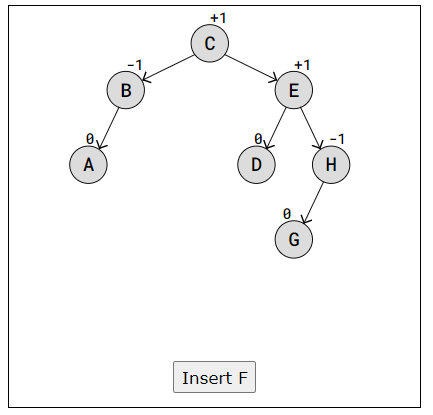

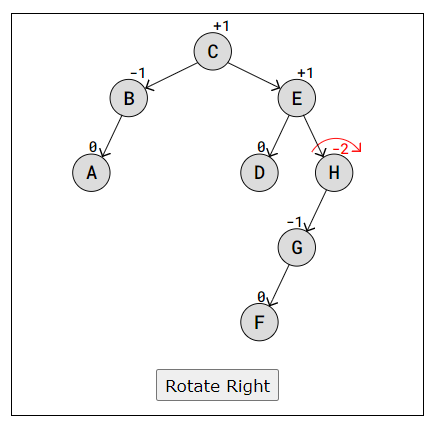

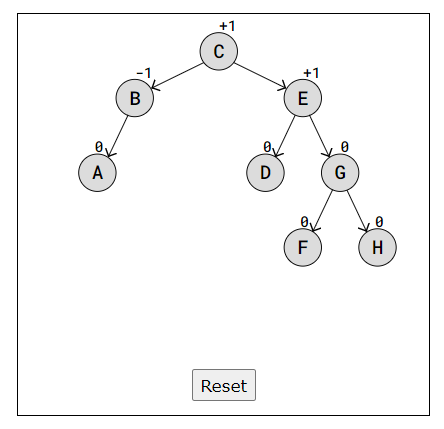

After node F is inserted, the code will retrace, calculating balancing factors as it propagates back up towards the root node. When node H is reached and the balancing factor -2 is calculated, a right rotation is done. Only after this rotation is done, the code will continue to retrace, calculating balancing factors further up on ancestor nodes E and C.

Because of the rotation, balancing factors for nodes E and C stay the same as before node F was inserted.

## AVL Insert Node Implementation

There is only one new attribute for each node in the AVL tree compared to the BST, and that is the height, but there are many new functions and extra code lines needed for the AVL Tree implementation because of how the AVL Tree rebalances itself.

The implementation below builds an AVL tree based on a list of characters, to create the AVL Tree in the simulation above. The last node to be inserted 'F', also triggers a right rotation, just like in the simulation above.

In [1]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.height = 1

def getHeight(node):
    if not node:
        return 0
    return node.height

def getBalance(node):
    if not node:
        return 0
    return getHeight(node.left) - getHeight(node.right)

def rightRotate(y):
    print('Rotate right on node',y.data)
    x = y.left
    T2 = x.right
    x.right = y
    y.left = T2
    y.height = 1 + max(getHeight(y.left), getHeight(y.right))
    x.height = 1 + max(getHeight(x.left), getHeight(x.right))
    return x

def leftRotate(x):
    print('Rotate left on node',x.data)
    y = x.right
    T2 = y.left
    y.left = x
    x.right = T2
    x.height = 1 + max(getHeight(x.left), getHeight(x.right))
    y.height = 1 + max(getHeight(y.left), getHeight(y.right))
    return y

def insert(node, data):
    if not node:
        return TreeNode(data)

    if data < node.data:
        node.left = insert(node.left, data)
    elif data > node.data:
        node.right = insert(node.right, data)

    node.height = 1 + max(getHeight(node.left), getHeight(node.right))
    balance = getBalance(node)

    # Left Left
    if balance > 1 and data < node.left.data:
        return rightRotate(node)

    # Right Right
    if balance < -1 and data > node.right.data:
        return leftRotate(node)

    # Left Right
    if balance > 1 and data > node.left.data:
        node.left = leftRotate(node.left)
        return rightRotate(node)

    # Right Left
    if balance < -1 and data < node.right.data:
        node.right = rightRotate(node.right)
        return leftRotate(node)

    return node

def inOrderTraversal(node):
    if node is None:
        return
    inOrderTraversal(node.left)
    print(node.data, end=", ")
    inOrderTraversal(node.right)

# Inserting nodes
root = None
letters = ['C', 'B', 'E', 'A', 'D', 'H', 'G', 'F']
for letter in letters:
    root = insert(root, letter)

inOrderTraversal(root)

Rotate right on node H
A, B, C, D, E, F, G, H, 

## AVL Delete Node Implementation

When deleting a node that is not a leaf node, the AVL Tree requires the minValueNode() function to find a node's next node in the in-order traversal. This is the same as when deleting a node in a Binary Search Tree.

To delete a node in an AVL Tree, the same code to restore balance is needed as for the code to insert a node.

In [2]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.height = 1

def getHeight(node):
    if not node:
        return 0
    return node.height

def getBalance(node):
    if not node:
        return 0
    return getHeight(node.left) - getHeight(node.right)

def rightRotate(y):
    x = y.left
    T2 = x.right
    x.right = y
    y.left = T2
    y.height = 1 + max(getHeight(y.left), getHeight(y.right))
    x.height = 1 + max(getHeight(x.left), getHeight(x.right))
    return x

def leftRotate(x):
    y = x.right
    T2 = y.left
    y.left = x
    x.right = T2
    x.height = 1 + max(getHeight(x.left), getHeight(x.right))
    y.height = 1 + max(getHeight(y.left), getHeight(y.right))
    return y

def insert(node, data):
    if not node:
        return TreeNode(data)

    if data < node.data:
        node.left = insert(node.left, data)
    elif data > node.data:
        node.right = insert(node.right, data)

    node.height = 1 + max(getHeight(node.left), getHeight(node.right))
    balance = getBalance(node)

    # Left Left
    if balance > 1 and data < node.left.data:
        return rightRotate(node)

    # Right Right
    if balance < -1 and data > node.right.data:
        return leftRotate(node)

    # Left Right
    if balance > 1 and data > node.left.data:
        node.left = leftRotate(node.left)
        return rightRotate(node)

    # Right Left
    if balance < -1 and data < node.right.data:
        node.right = rightRotate(node.right)
        return leftRotate(node)

    return node

def inOrderTraversal(node):
    if node is None:
        return
    inOrderTraversal(node.left)
    print(node.data, end=", ")
    inOrderTraversal(node.right)
    
def minValueNode(node):
    current = node
    while current.left is not None:
        current = current.left
    return current

def minValueNode(node):
    current = node
    while current.left is not None:
        current = current.left
    return current

def delete(node, data):
    if not node:
        return node

    if data < node.data:
        node.left = delete(node.left, data)
    elif data > node.data:
        node.right = delete(node.right, data)
    else:
        if node.left is None:
            temp = node.right
            node = None
            return temp
        elif node.right is None:
            temp = node.left
            node = None
            return temp

        temp = minValueNode(node.right)
        node.data = temp.data
        node.right = delete(node.right, temp.data)

    if node is None:
        return node

    # Update the balance factor and balance the tree
    node.height = 1 + max(getHeight(node.left), getHeight(node.right))
    balance = getBalance(node)

    # Balancing the tree
    # Left Left
    if balance > 1 and getBalance(node.left) >= 0:
        return rightRotate(node)

    # Left Right
    if balance > 1 and getBalance(node.left) < 0:
        node.left = leftRotate(node.left)
        return rightRotate(node)

    # Right Right
    if balance < -1 and getBalance(node.right) <= 0:
        return leftRotate(node)

    # Right Left
    if balance < -1 and getBalance(node.right) > 0:
        node.right = rightRotate(node.right)
        return leftRotate(node)

    return node

# Inserting the letters
root = None
letters = ['C', 'B', 'E', 'A', 'D', 'H', 'G', 'F']
for letter in letters:
    root = insert(root, letter)

inOrderTraversal(root)
print('\nDeleting A')
root = delete(root,'A')
inOrderTraversal(root)


A, B, C, D, E, F, G, H, 
Deleting A
B, C, D, E, F, G, H, 

## Time Complexity for AVL Trees

Take a look at the unbalanced Binary Search Tree below. Searching for "M" means that all nodes except 1 must be compared. But searching for "M" in the AVL Tree below only requires us to visit 4 nodes.

So in worst case, algorithms like search, insert, and delete must run through the whole height of the tree. This means that keeping the height (
h
) of the tree low, like we do using AVL Trees, gives us a lower runtime.

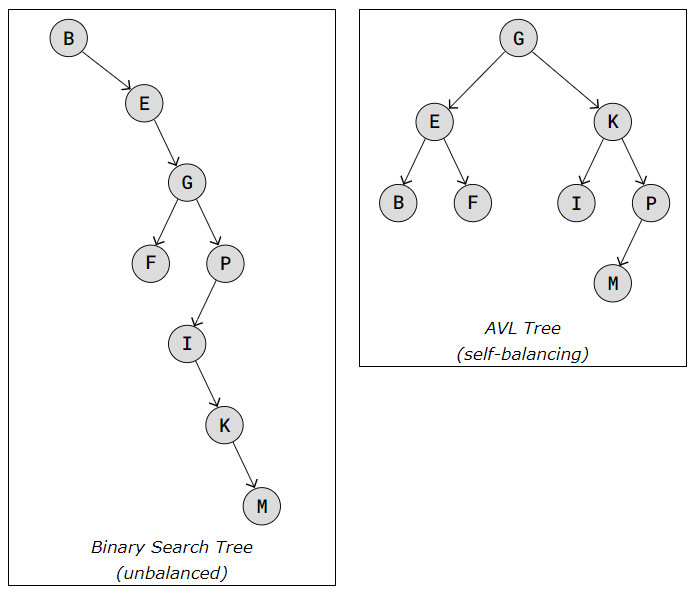

The BST is not self-balancing. This means that a BST can be very unbalanced, almost like a long chain, where the height is nearly the same as the number of nodes. This makes operations like searching, deleting and inserting nodes slow, with time complexity O(h)=O(n).
The AVL Tree however is self-balancing. That means that the height of the tree is kept to a minimum so that operations like searching, deleting and inserting nodes are much faster, with time complexity O(h)=O(logn).